# Etapa 1: Entendimento do Problema
Qual pergunta eu quero responder? É algo preditivo? 

# Etapa 2: Coleta dos Dados
Onde eu vou conseguir os dados para responder essa pergunta? Quais são as fontes? 

Kaggle: [Venda de Video Games](https://www.kaggle.com/gregorut/videogamesales)

# Etapa 3: Análise Exploratória dos Dados (EDA)
Aqui nos vamos destrinchar os dados, entender tudo o que for importante para responder nossa pergunta

Importando as bibliotecas

In [4]:
#Manipulação dos Dados
import pandas as pd
import numpy as np

#Visualização de Dados
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Cálculos Estatísticos
from scipy import stats

Paleta de Cores

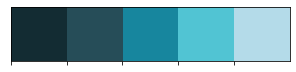

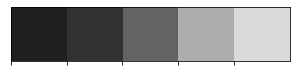

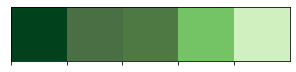

In [5]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

In [6]:
df = pd.read_csv("vgsales.csv")

Primeira Inspeção

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
rows, columns = df.shape

In [11]:
print(f"Rows: {rows}")

Rows: 16598


In [12]:
print(f"Columns: {columns}")

Columns: 11


Dicionário de Dados

* Rank - Ranking de vendas gerais (int)

* Name - O nome dos jogos (object)

* Platform - Plataforma do lançamento dos jogos (ou seja, PC, PS4, etc.)

* Year - Ano de lançamento do jogo

* Genre - Gênero do jogo

* Publisher - Editora do jogo

* NA_Sales - Vendas na América do Norte (em milhões)

* EU_Sales - Vendas na Europa (em milhões)

* JP_Sales - Vendas no Japão (em milhões)

* Other_Sales - Vendas no resto do mundo (em milhões)

* Global_Sales - Total de vendas mundiais.



Informações Estatísticas

In [13]:
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [14]:
df.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


Dados Faltantes

In [15]:
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

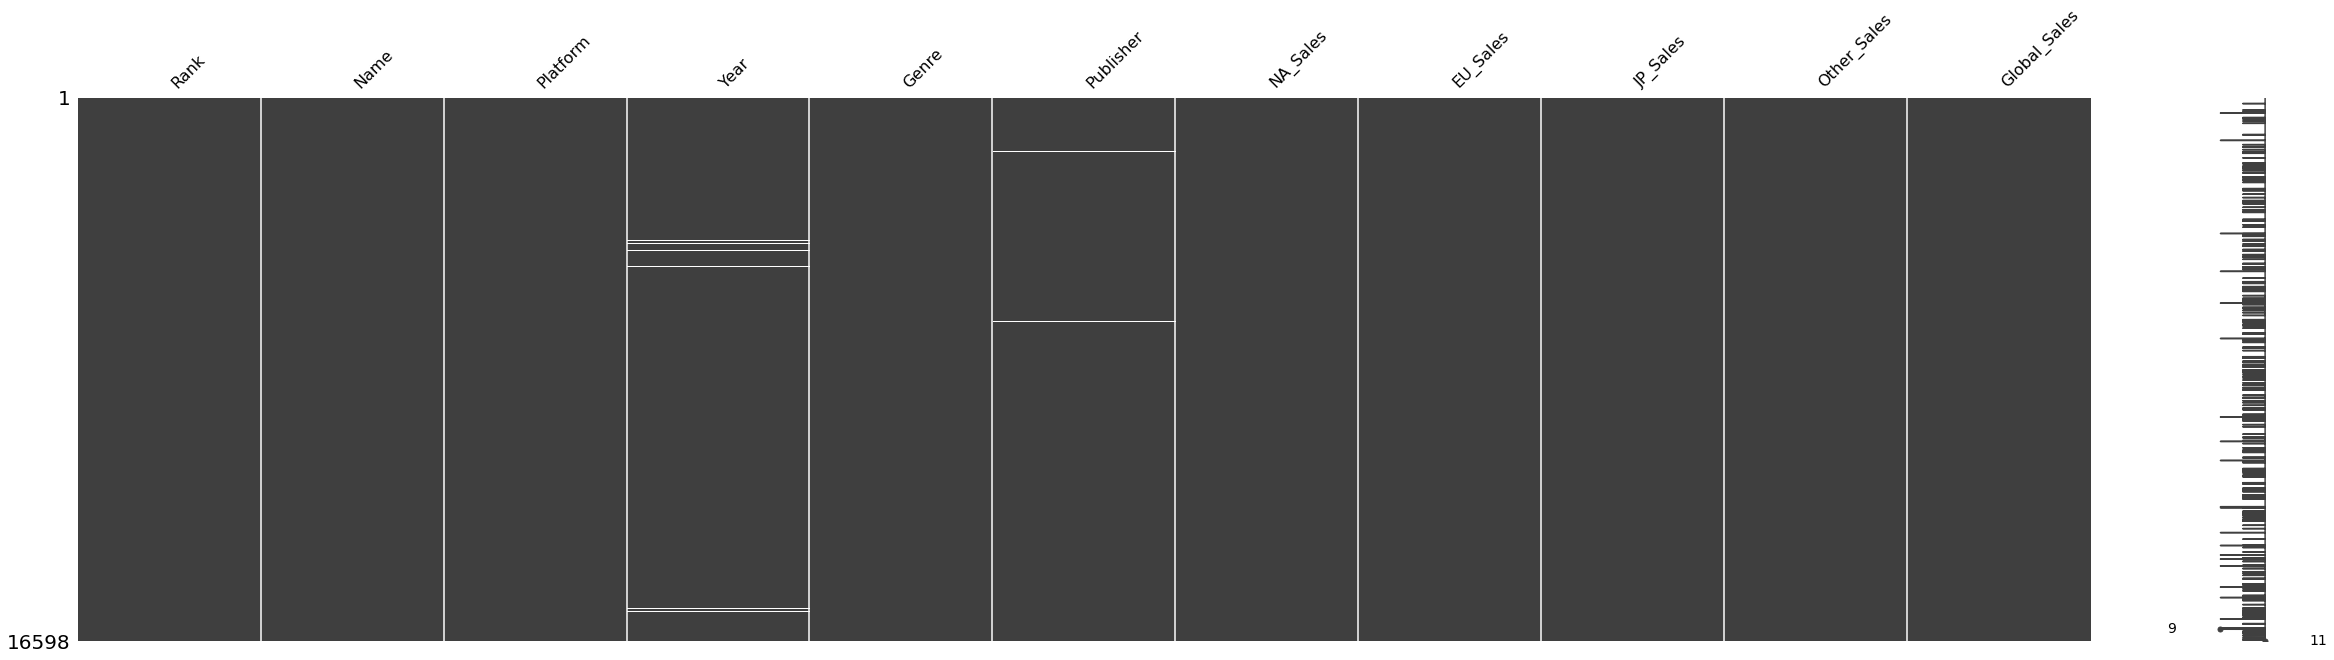

In [16]:
missingno.matrix(df, figsize=(40,10))

In [17]:
percentual_nan = (df.isnull().sum()/rows) * 100

In [18]:
percentual_nan

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [19]:
df[df.isnull().any(axis=1)].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


Duplicatas

In [20]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


#### Features

Name - O nome dos jogos (object)

In [21]:
df["Name"].nunique()

11493

In [22]:
df["Name"].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

Qual jogo tem maior preço de venda?

In [23]:
top_sales_game = df.head(15)

In [24]:
top_sales_game.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [25]:
top_sales_game = top_sales_game[['Name', "Year", "Genre", "Global_Sales"]]

In [26]:
top_sales_game.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37


In [27]:
top_sales_game = top_sales_game.sort_values(by=["Global_Sales"], ascending=False)

In [28]:
top_sales_game.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37


In [29]:
name_game = top_sales_game["Name"]
year_game = top_sales_game["Year"]
y = np.arange(0,20)

In [30]:
top_sales_game['Global_Sales'].values

array([82.74, 40.24, 35.82, 33.  , 31.37, 30.26, 30.01, 29.02, 28.62,
       28.31, 24.76, 23.42, 23.1 , 22.72, 22.  ])

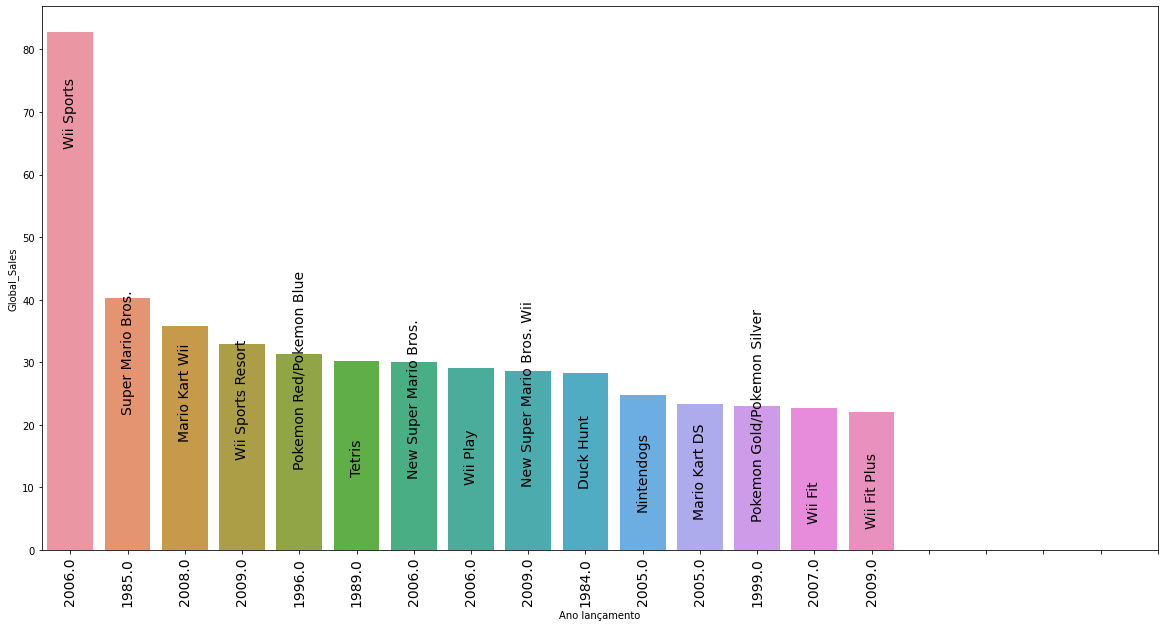

In [31]:
plt.figure(figsize=(20, 10))
genre_graph_bar = sns.barplot(x='Name', y='Global_Sales', data=top_sales_game)
index = 0
for i in top_sales_game['Global_Sales'].values:
  genre_graph_bar.text(index, i - 18, name_game[index], color='#000', size=14, rotation= 90, ha="center")
  index += 1

plt.xticks(y, top_sales_game['Year'], fontsize=14, rotation=90)
plt.xlabel('Ano lançamento')
plt.show()

Platform - Plataforma do lançamento dos jogos (ou seja, PC, PS4, etc.)

In [32]:
df["Platform"].nunique()

31

In [33]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [34]:
df["Platform"].value_counts(ascending=False)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Qual plataforma tem o maior preço de venda?

In [35]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()

In [36]:
df_platform.head()

Platform
2600     97.08
3DO       0.10
3DS     247.46
DC       15.97
DS      822.49
Name: Global_Sales, dtype: float64

In [37]:
df_platform = df_platform.reset_index()

In [38]:
df_platform.head()

,Platform,Global_Sales
0,2600,97.08
1,3DO,0.10
2,3DS,247.46
3,DC,15.97
4,DS,822.49


In [39]:
df_platform = df_platform.sort_values(by=["Global_Sales"], ascending=False)

In [40]:
df_platform.head()

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

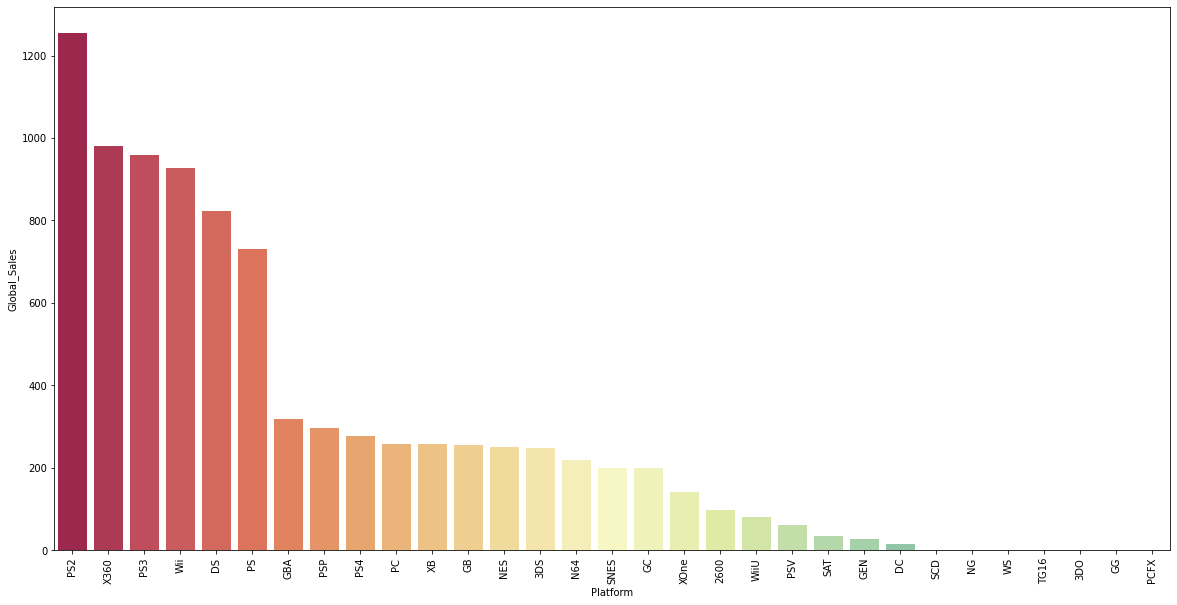

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Platform", y="Global_Sales", data=df_platform, palette="Spectral")
plt.xticks(rotation=90)

Year - Ano de lançamento do jogo

In [42]:
df["Year"].nunique()

39

In [43]:
df["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [44]:
df["Year"].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: Year, dtype: float64

In [45]:
df["Year"].dtypes

dtype('float64')

In [46]:
df.fillna(-1, inplace=True)

In [47]:
df["Year"] = df["Year"].astype("int64")

In [48]:
df["Year"].dtypes

dtype('int64')

In [49]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Jogos lançados por ano

In [50]:
df.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).head(5)

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

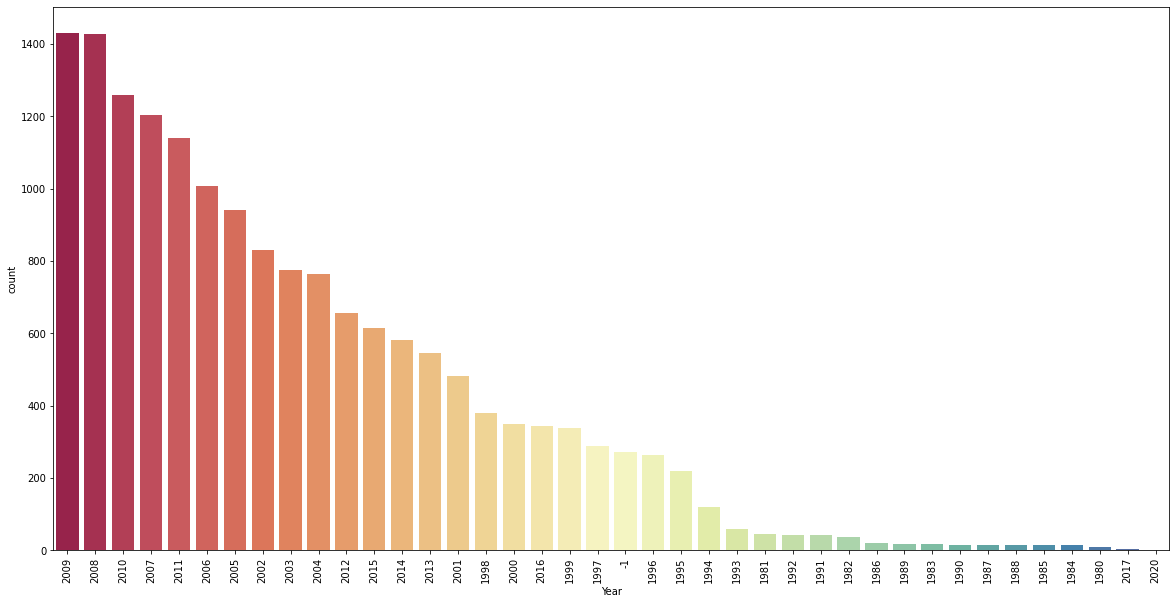

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=df, order=df.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index, palette="Spectral")
plt.xticks(rotation=90)

Genre - Gênero do jogo

In [52]:
df["Genre"].nunique()

12

In [53]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [54]:
df["Genre"].value_counts(ascending=False)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

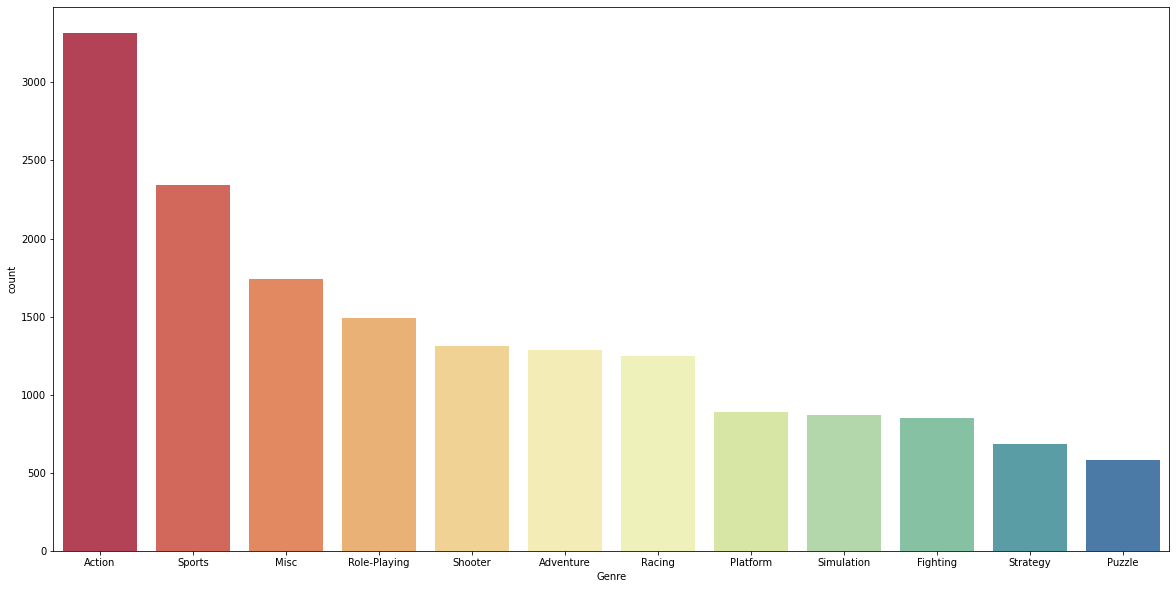

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x="Genre", data=df, order=df["Genre"].value_counts().index, palette="Spectral")

Qual gênero de jogo foi mais lançado por ano?

In [56]:
max_year_df = df.groupby(["Year", "Genre"]).size().reset_index(name="count")

In [57]:
max_year_df.tail(10)

,Year,Genre,count
391,2016,Platform,10
392,2016,Racing,20
393,2016,Role-Playing,40
394,2016,Shooter,32
395,2016,Simulation,9
396,2016,Sports,38
397,2016,Strategy,10
398,2017,Action,1
399,2017,Role-Playing,2
400,2020,Simulation,1


In [58]:
max_year_idx = max_year_df.groupby(["Year"])["count"].transform(max) == max_year_df["count"]

In [59]:
max_year_idx.head()

0     True
1    False
2    False
3    False
4    False
Name: count, dtype: bool

In [60]:
max_year_genre = max_year_df[max_year_idx].reset_index(drop=True)

In [61]:
max_year_genre

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7
5,1984,Puzzle,3
6,1984,Racing,3
7,1984,Shooter,3
8,1985,Platform,4
9,1985,Puzzle,4


In [62]:
max_year_genre = max_year_genre.drop_duplicates(subset=["Year", "count"], keep="last").reset_index(drop=True)

In [63]:
max_year_genre.head()

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7


In [64]:
genre = max_year_genre["Genre"].values

In [65]:
genre

array(['Action', 'Misc', 'Action', 'Action', 'Action', 'Shooter',
       'Puzzle', 'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports',
       'Sports', 'Fighting', 'Platform', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

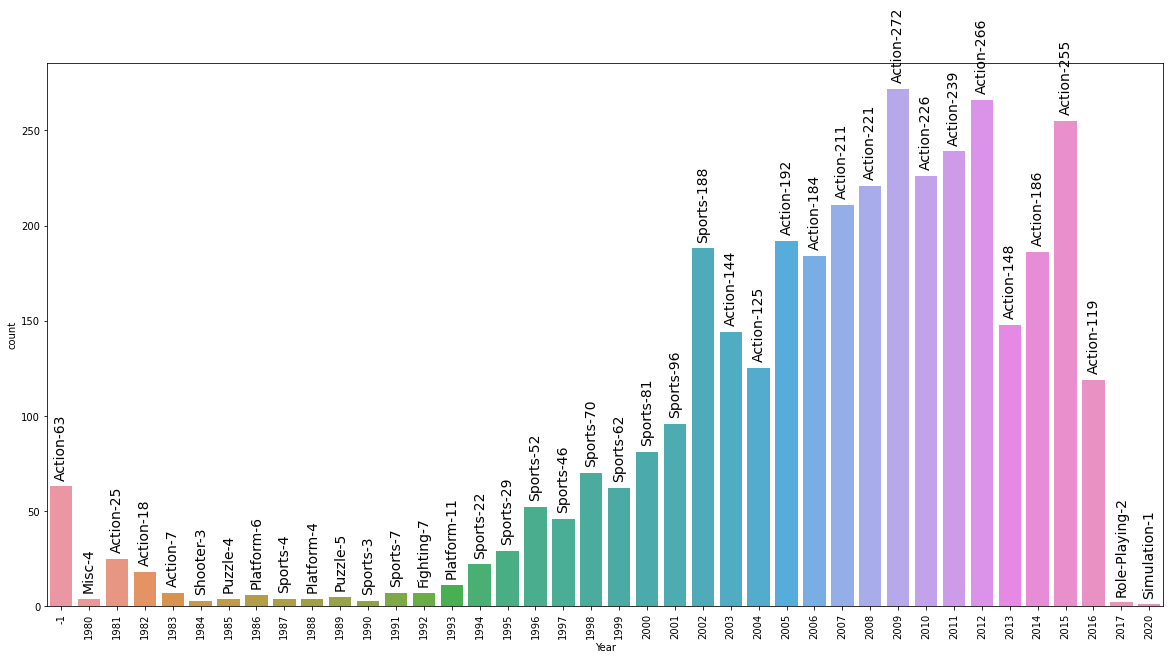

In [66]:
plt.figure(figsize=(20,10))
genre_graph_bar = sns.barplot(x="Year", y="count", data=max_year_genre)
index = 0
for i in max_year_genre['count'].values:
  genre_graph_bar.text(index, i + 5, str(genre[index] + '-' + str(i)), color='#000', size=14, rotation= 90, ha="center") 
  index += 1

plt.xticks(rotation=90)
plt.show()

Qual gênero de jogo foi mais vendido por ano

In [67]:
sales_year_idx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()

In [68]:
sales_year_idx

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,-1,Adventure,4.24
2,-1,Fighting,4.86
3,-1,Misc,12.34
4,-1,Platform,2.22
...,...,...,...
396,2016,Sports,14.60
397,2016,Strategy,0.50
398,2017,Action,0.01
399,2017,Role-Playing,0.04


In [69]:
sales_year = sales_year_idx.groupby(by=['Year'])['Global_Sales'].transform(max) == sales_year_idx['Global_Sales']

In [70]:
sales_year

0       True
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399     True
400     True
Name: Global_Sales, Length: 401, dtype: bool

In [71]:
sales_year_max = sales_year_idx[sales_year].reset_index(drop=True)

In [72]:
sales_year_max.head()

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,1980,Shooter,7.07
2,1981,Action,14.84
3,1982,Puzzle,10.03
4,1983,Platform,6.93


In [73]:
genre = sales_year_max["Genre"]

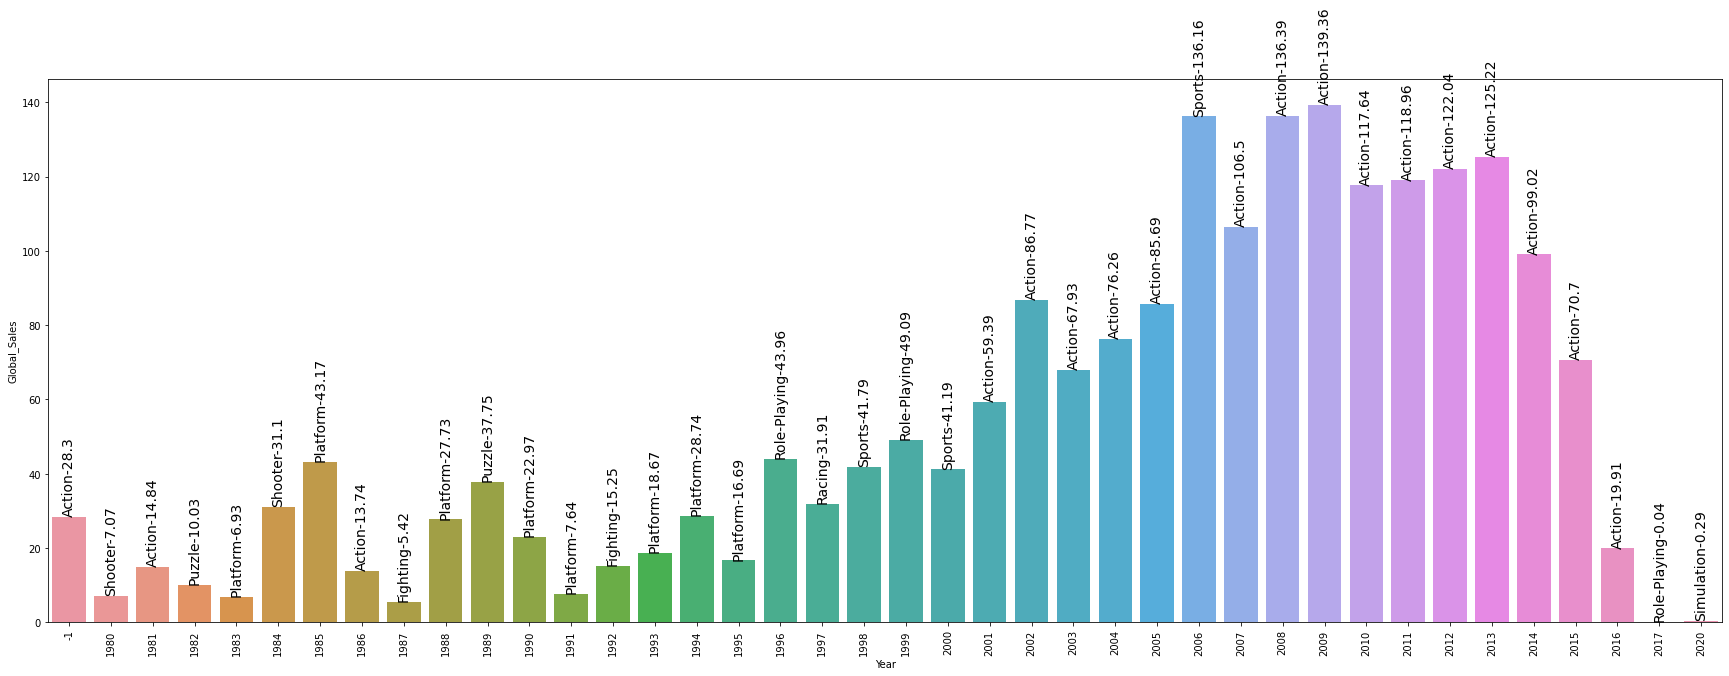

In [74]:
plt.figure(figsize=(30, 10))
genre_graph_bar = sns.barplot(x='Year', y='Global_Sales', data=sales_year_max)
index = 0
for i in sales_year_max['Global_Sales'].values:
  genre_graph_bar.text(index, i + 1, str(genre[index] + '-' + str(round(i,2))), color='#000', size=14, rotation= 90, ha="center") 
  index += 1

plt.xticks(rotation=90)
plt.show()

Qual gênero de jeogo tem o preço mais alto (globamente)

In [75]:
df_genre = df.groupby(by=["Genre"])["Global_Sales"].sum()

In [76]:
df_genre.head()

Genre
Action       1751.18
Adventure     239.04
Fighting      448.91
Misc          809.96
Platform      831.37
Name: Global_Sales, dtype: float64

In [77]:
df_genre = df_genre.reset_index()

In [78]:
df_genre = df_genre.sort_values(by="Global_Sales", ascending=False)

In [79]:
df_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

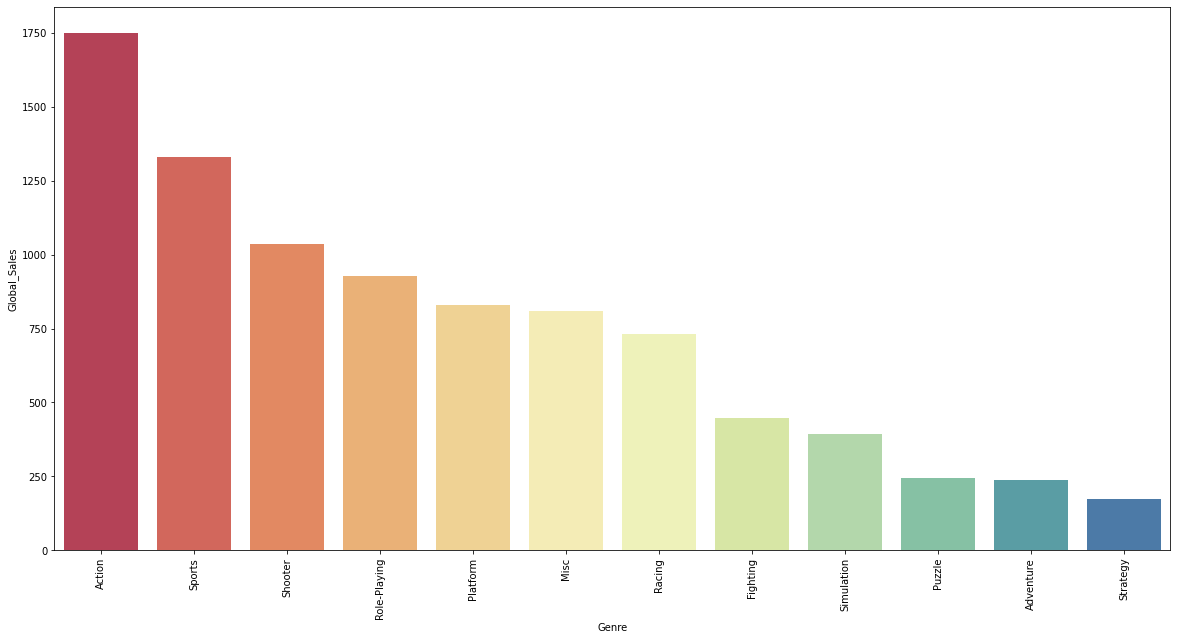

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x="Genre", y="Global_Sales", data=df_genre, palette="Spectral")
plt.xticks(rotation=90)

Dentro de cada ano, quais foram os gêneros de jogos mais lançados

In [81]:
df["Year"].value_counts().iloc[:3].index

Int64Index([2009, 2008, 2010], dtype='int64')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

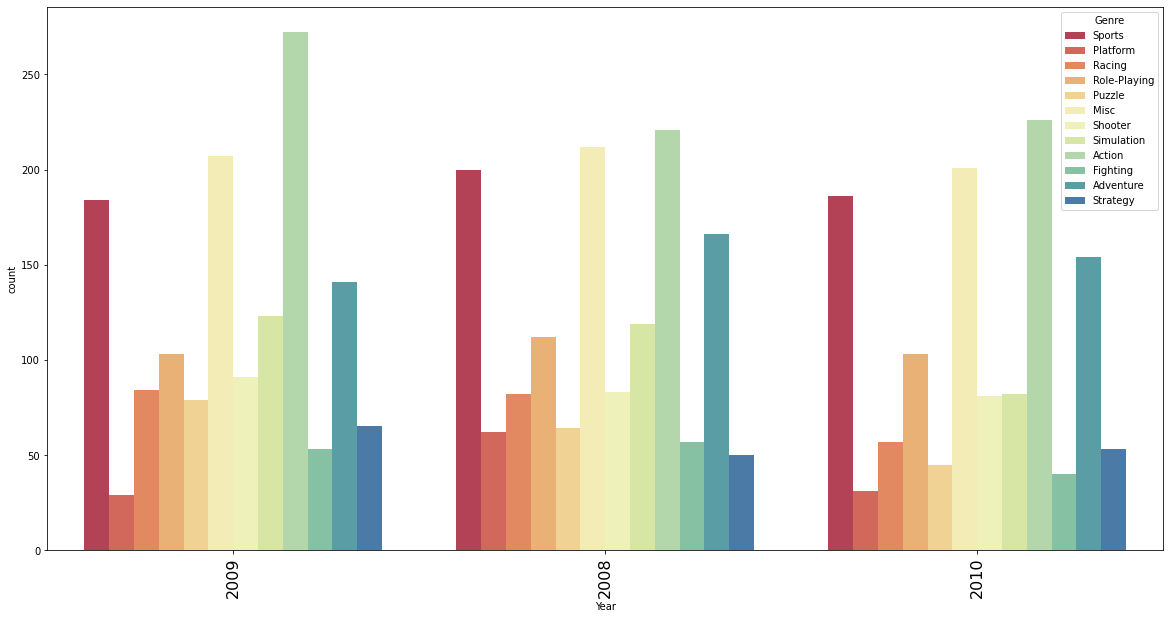

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=df, hue="Genre", order=df["Year"].value_counts().iloc[:3].index, palette="Spectral")
plt.xticks(size=16, rotation=90)

Publisher - Editora do jogo

In [83]:
df["Publisher"].nunique()

579

In [84]:
df["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       -1, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
 

Quais as principais vendas globais por editor (publisher)

In [85]:
sales_publisher = df[["Publisher", "Global_Sales"]]

In [86]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37


In [87]:
sales_publisher = sales_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)

In [88]:
sales_publisher.head(5)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

In [89]:
sales_publisher = pd.DataFrame(sales_publisher).reset_index()

In [90]:
sales_publisher.head()

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

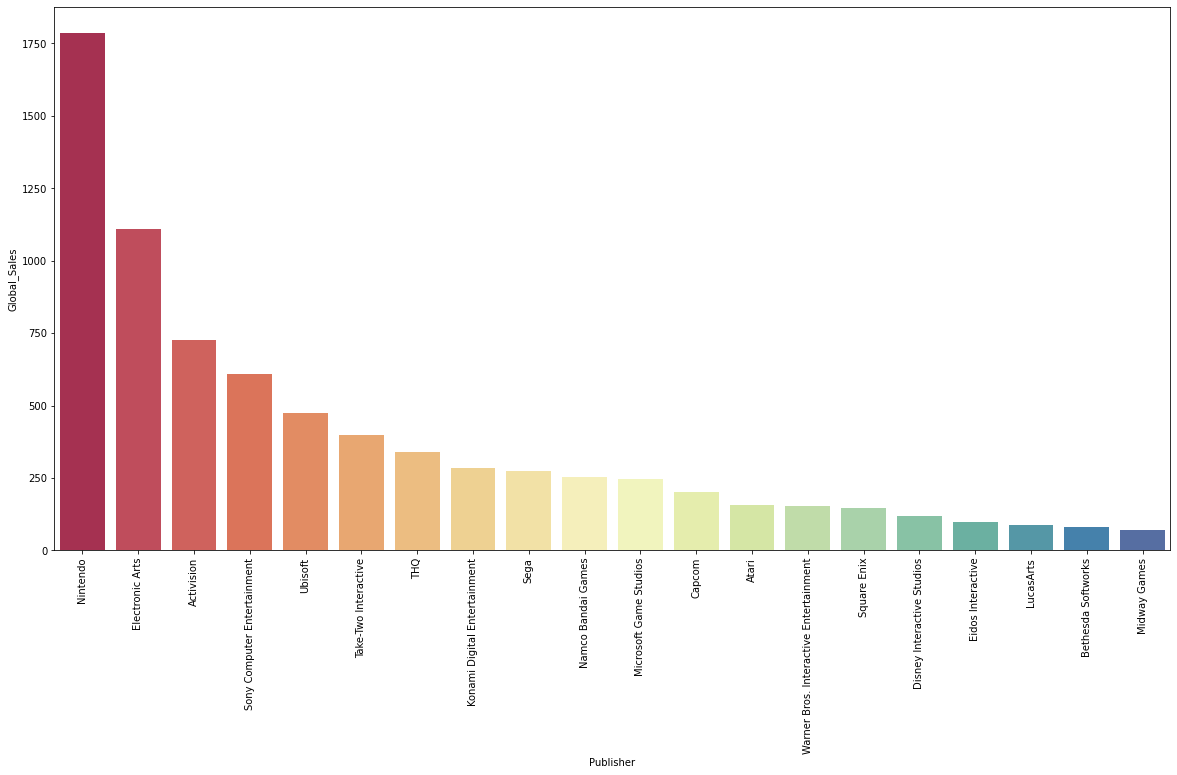

In [91]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sales_publisher, palette="Spectral")
plt.xticks(rotation=90)

NA_Sales - Vendas na América do Norte (em milhões)

In [92]:
df["NA_Sales"].sum()

4392.950000000001

In [93]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [94]:
df["NA_Sales"].describe()

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [95]:
df["NA_Sales"].sort_values(ascending=False)

0        41.49
1        29.08
9        26.93
5        23.20
2        15.85
         ...  
8808      0.00
8799      0.00
8795      0.00
13576     0.00
5816      0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [96]:
df[df["NA_Sales"] == 0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.0,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01


In [97]:
df[df["NA_Sales"] == 41.49]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


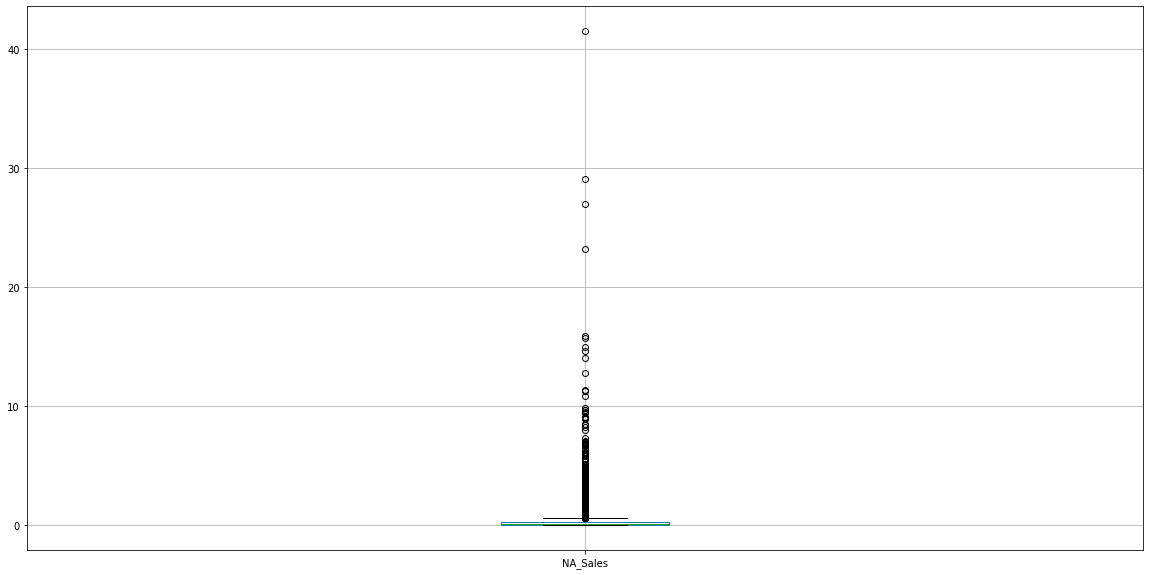

In [98]:
plt.figure(figsize=(20,10))
df.boxplot("NA_Sales")
plt.show()

In [99]:
df_nasales_year = df.groupby(by=["Year"])['NA_Sales'].sum()

In [100]:
df_nasales_year = df_nasales_year.reset_index()

In [101]:
df_nasales_year.head()

,Year,NA_Sales
0,-1,59.52
1,1980,10.59
2,1981,33.40
3,1982,26.92
4,1983,7.76


In [102]:
df_nasales_year.tail()

,Year,NA_Sales
35,2014,131.97
36,2015,102.82
37,2016,22.66
38,2017,0.00
39,2020,0.27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

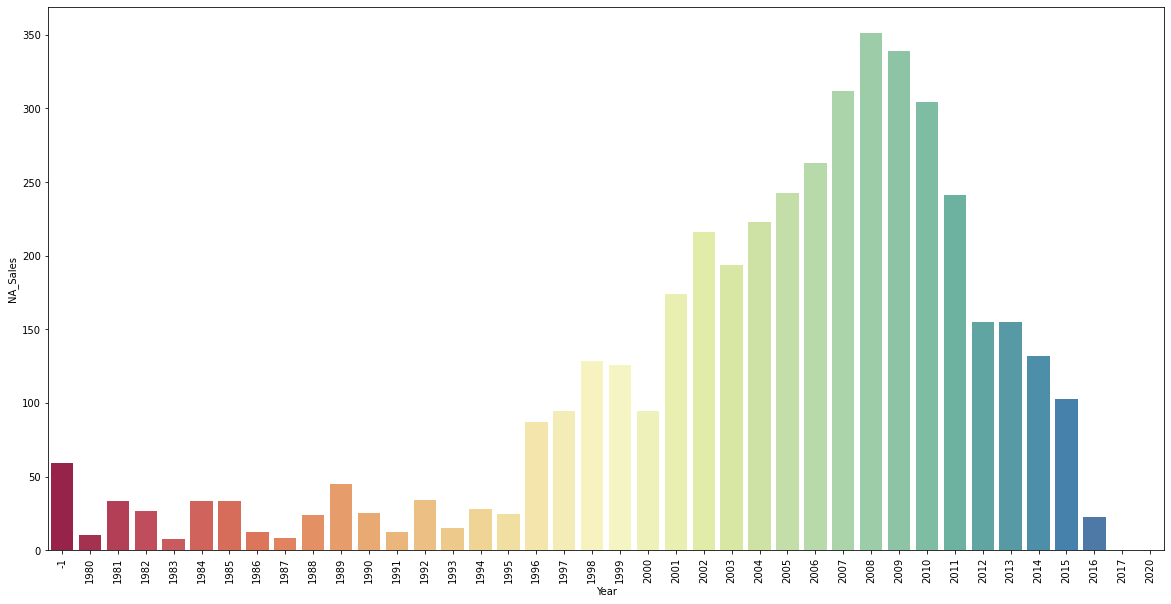

In [103]:
plt.figure(figsize=(20,10))
sns.barplot(x="Year", y="NA_Sales", data=df_nasales_year, palette="Spectral")
plt.xticks(rotation=90)

EU_Sales - Vendas na Europa (em milhões)

In [104]:
df["EU_Sales"].sum()

2434.1299999999997

In [105]:
df["EU_Sales"].describe()

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [106]:
df["EU_Sales"].sort_values(ascending=False)

0        29.02
2        12.88
3        11.01
10       11.00
16        9.27
         ...  
12566     0.00
12565     0.00
12564     0.00
12563     0.00
16597     0.00
Name: EU_Sales, Length: 16598, dtype: float64

In [107]:
df[df["EU_Sales"] == 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [108]:
df[df["EU_Sales"] == 0.00]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
147,148,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0.0,2.33,1.74,5.95
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.0,4.87,0.00,4.87
265,266,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,Konami Digital Entertainment,1.46,0.0,0.83,1.93,4.23
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.0,0.09,0.00,4.12
312,313,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.0,3.77,0.00,3.87
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.0,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.0,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.0,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.0,0.00,0.00,0.01


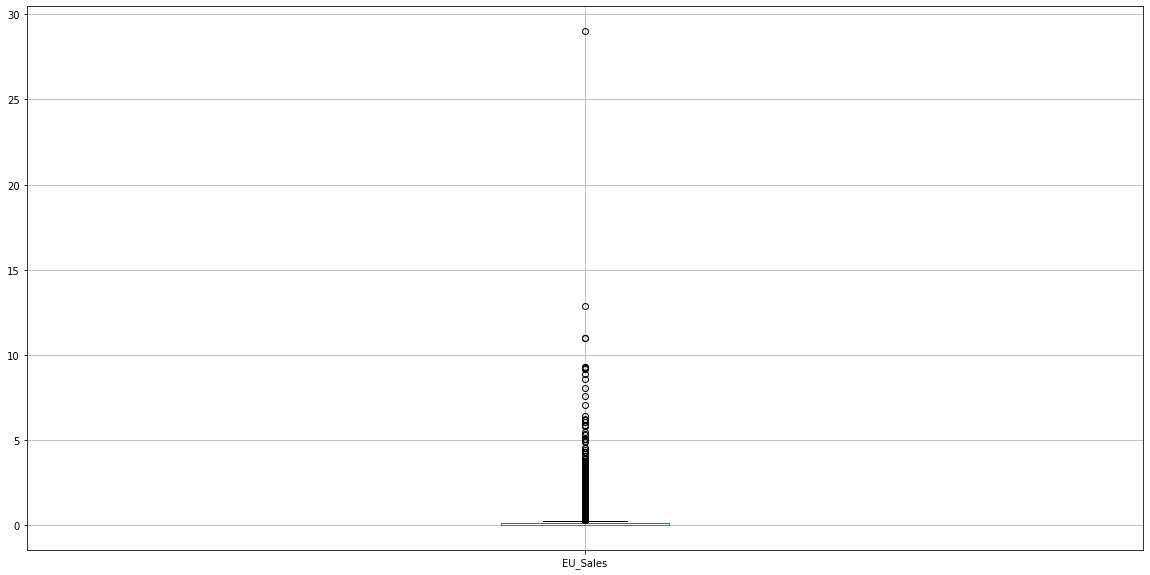

In [109]:
plt.figure(figsize=(20,10))
df.boxplot("EU_Sales")
plt.show()

In [110]:
df_eusales_year = df.groupby(by=["Year"])["EU_Sales"].sum()

In [111]:
df_eusales_year = df_eusales_year.reset_index()

In [112]:
df_eusales_year.head()

,Year,EU_Sales
0,-1,25.01
1,1980,0.67
2,1981,1.96
3,1982,1.65
4,1983,0.80


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

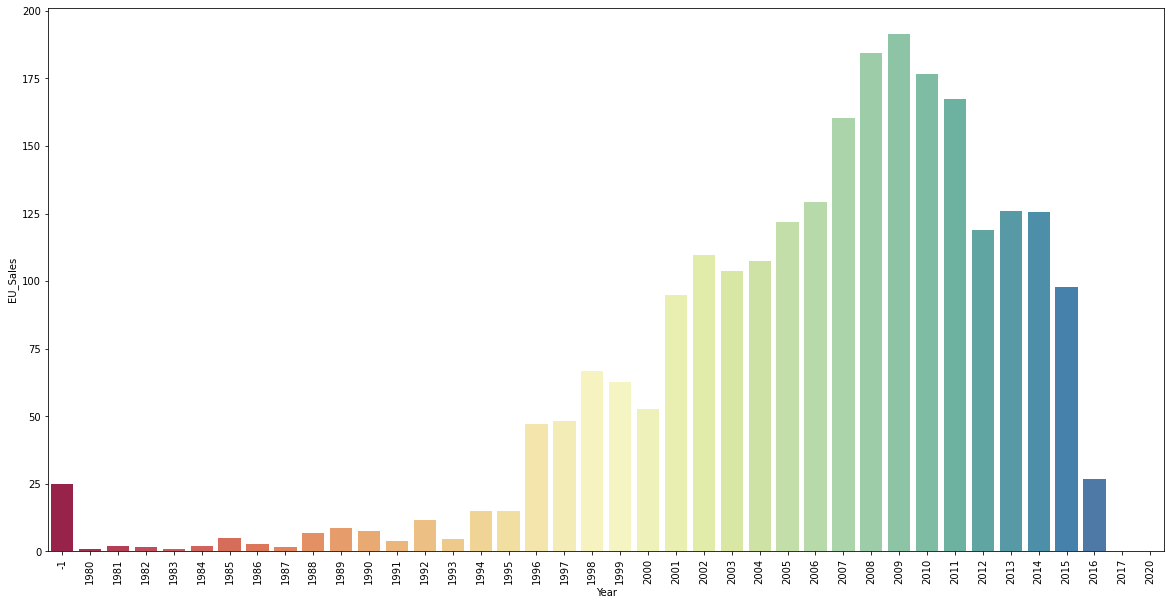

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x="Year", y="EU_Sales", data=df_eusales_year, palette="Spectral")
plt.xticks(rotation=90)


JP_Sales - Vendas no Japão (em milhões)

In [114]:
df["JP_Sales"].describe()

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [115]:
df["JP_Sales"].sort_values(ascending=False)

4        10.22
12        7.20
1         6.81
6         6.50
20        6.04
         ...  
7166      0.00
7167      0.00
7168      0.00
7172      0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64

In [116]:
df[df["JP_Sales"] == 10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


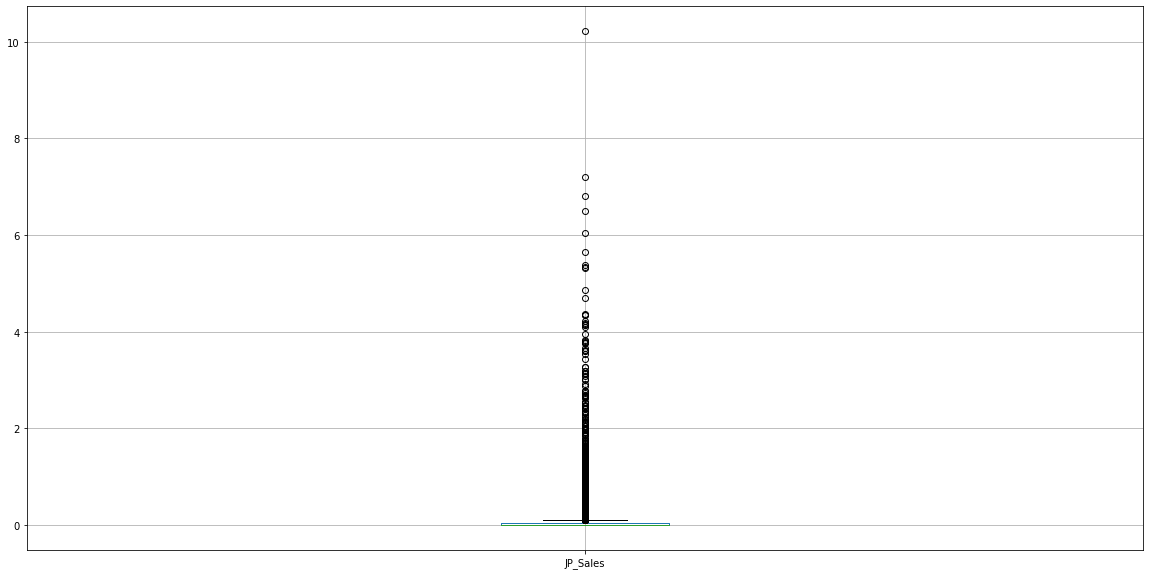

In [117]:
plt.figure(figsize=(20,10))
df.boxplot("JP_Sales")
plt.show()

In [118]:
df_jpsales_year = df.groupby(by=["Year"])["JP_Sales"].sum()

In [119]:
df_jpsales_year = df_jpsales_year.reset_index()

In [120]:
df_jpsales_year.tail()

,Year,JP_Sales
35,2014,39.46
36,2015,33.72
37,2016,13.70
38,2017,0.05
39,2020,0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

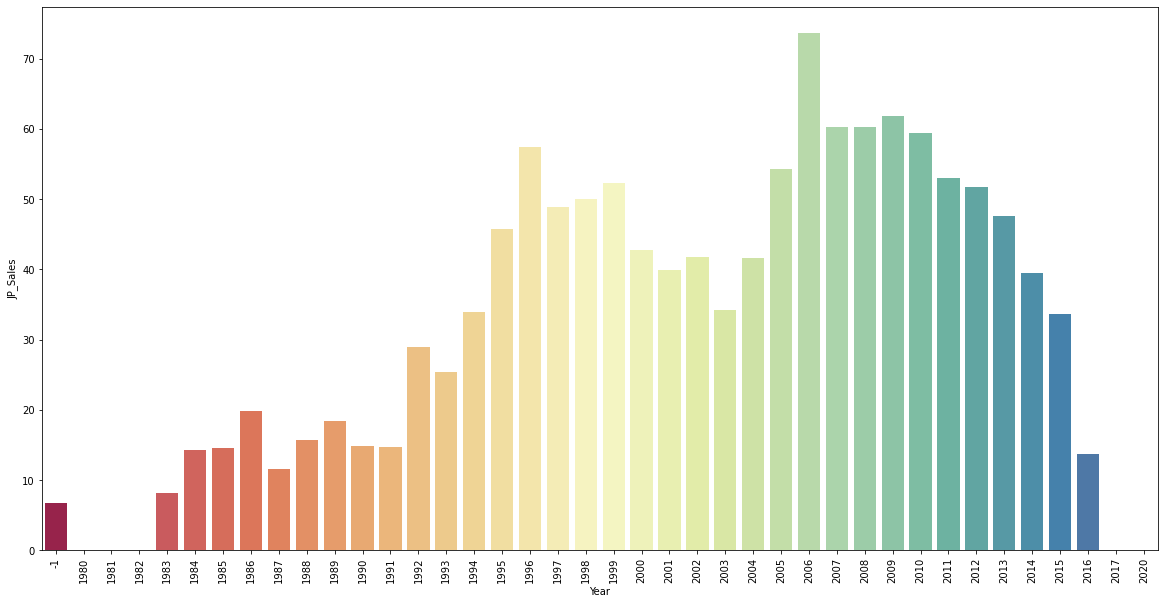

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x="Year", y="JP_Sales", data=df_jpsales_year, palette="Spectral")
plt.xticks(rotation=90)


Other_Sales - Vendas no resto do mundo (em milhões)



In [122]:
df["Other_Sales"].describe()

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [123]:
df["Other_Sales"].sort_values(ascending=False)

17       10.57
0         8.46
47        7.53
16        4.14
2         3.31
         ...  
12050     0.00
12049     0.00
12048     0.00
4414      0.00
16597     0.00
Name: Other_Sales, Length: 16598, dtype: float64

In [124]:
max_other_sales = df["Other_Sales"].max()

In [125]:
df[df["Other_Sales"] == max_other_sales]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


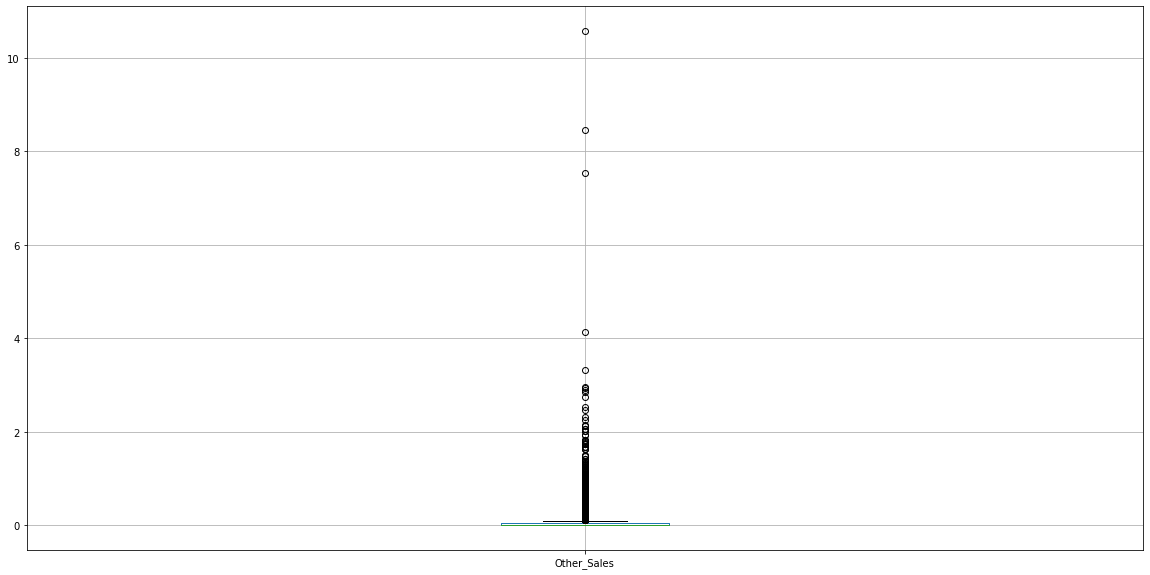

In [126]:
plt.figure(figsize=(20,10))
df.boxplot("Other_Sales")
plt.show()

In [127]:
df_othersales_year = df.groupby(by=['Year'])['Other_Sales'].sum()

In [128]:
df_othersales_year = df_othersales_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

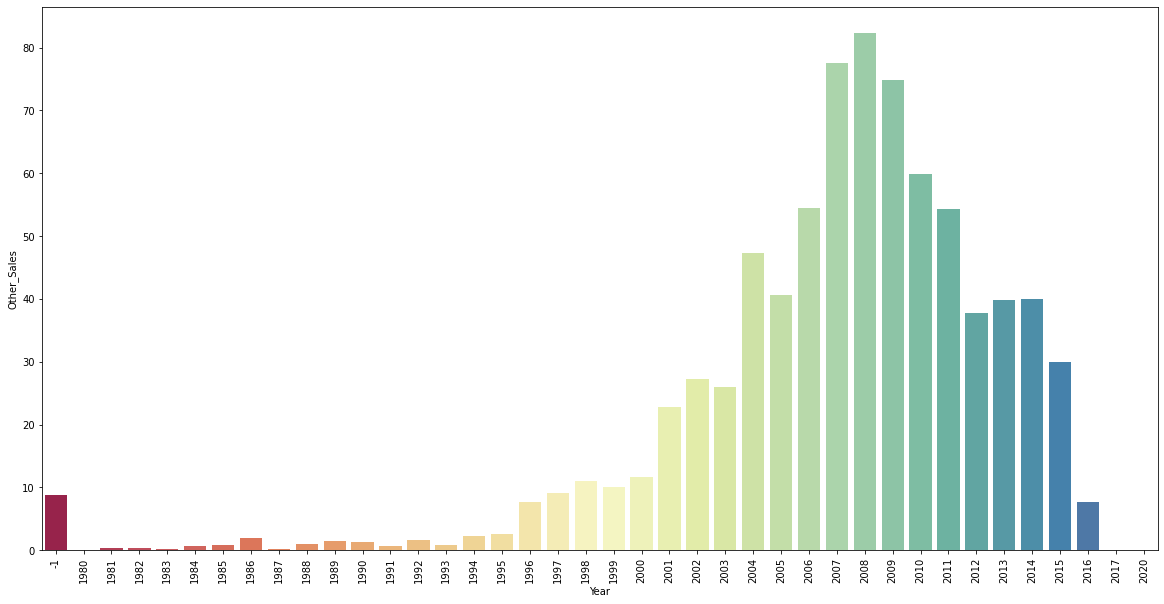

In [129]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Year", y="Other_Sales", data=df_othersales_year, palette="Spectral")
plt.xticks(rotation=90)

Global_Sales - Vendas em todo o mundo

In [130]:
df["Global_Sales"].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [131]:
df["Global_Sales"].sort_values(ascending=False)

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16186     0.01
16187     0.01
16188     0.01
16189     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

In [132]:
df[df["Global_Sales"]== 82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


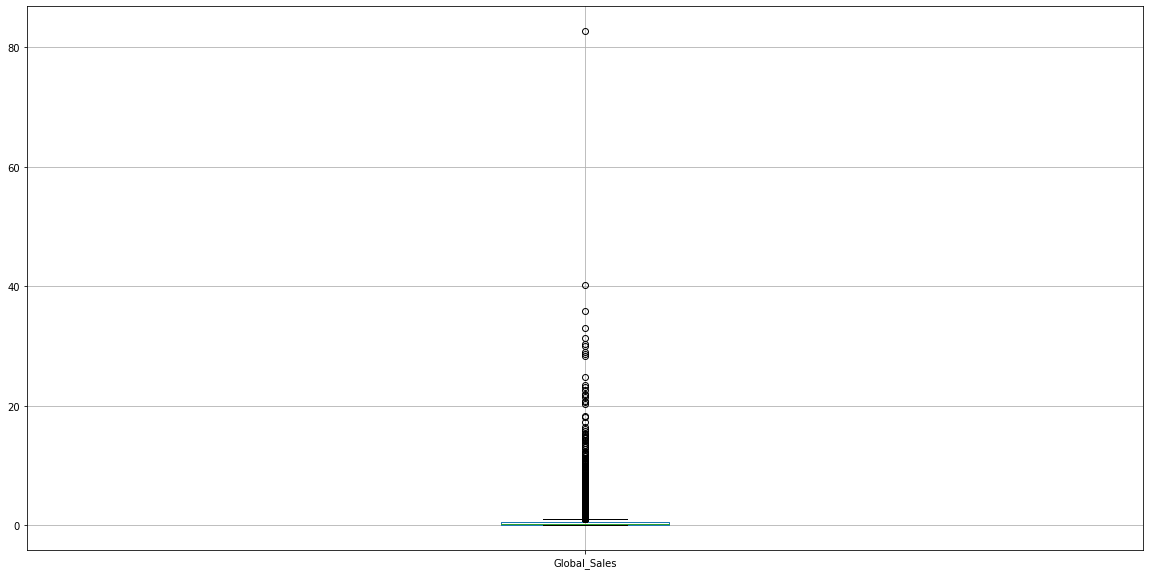

In [133]:
plt.figure(figsize=(20,10))
df.boxplot("Global_Sales")
plt.show()

In [134]:
df_globalsales_year = df.groupby(by=['Year'])['Global_Sales'].sum()

In [135]:
df_globalsales_year = df_globalsales_year.reset_index()

In [136]:
df_globalsales_year.head()

,Year,Global_Sales
0,-1,100.08
1,1980,11.38
2,1981,35.77
3,1982,28.86
4,1983,16.79


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

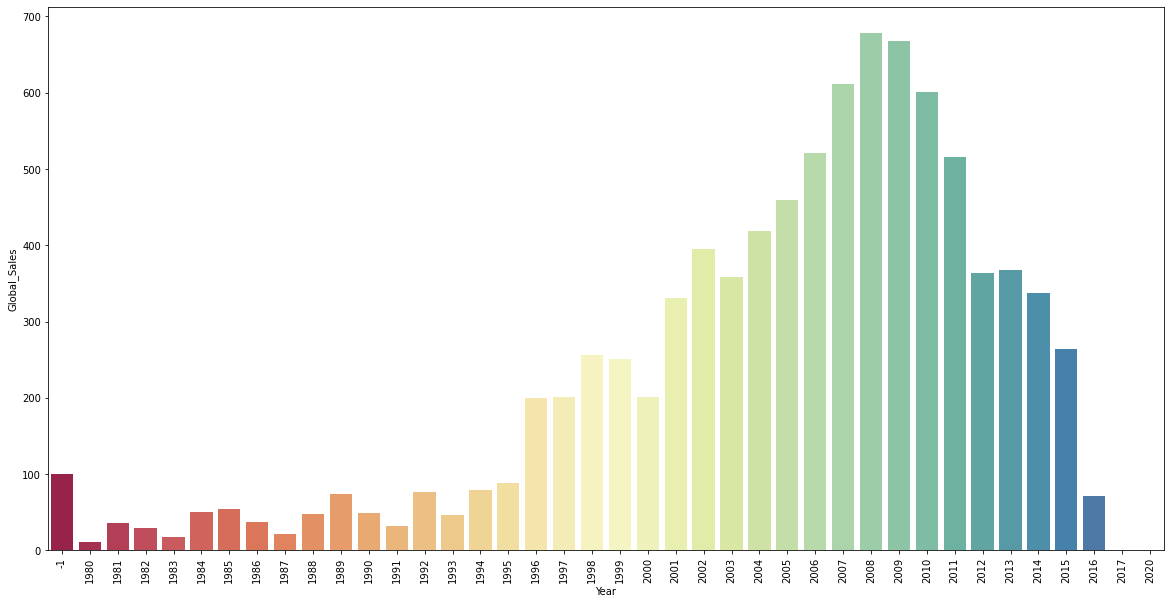

In [137]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Year", y="Global_Sales", data=df_globalsales_year, palette="Spectral")
plt.xticks(rotation=90)

Receita Total (Sales_Global) por "Pais"

In [138]:
top_sales_by_countrys = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [139]:
top_sales_by_countrys.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [140]:
top_sales_by_countrys = top_sales_by_countrys.sum().reset_index()

In [141]:
top_sales_by_countrys.head()

,index,0
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [142]:
top_sales_by_countrys = top_sales_by_countrys.rename(columns={"index": "Country", 0: "Sum of Sales"})

In [143]:
top_sales_by_countrys.head()

,Country,Sum of Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


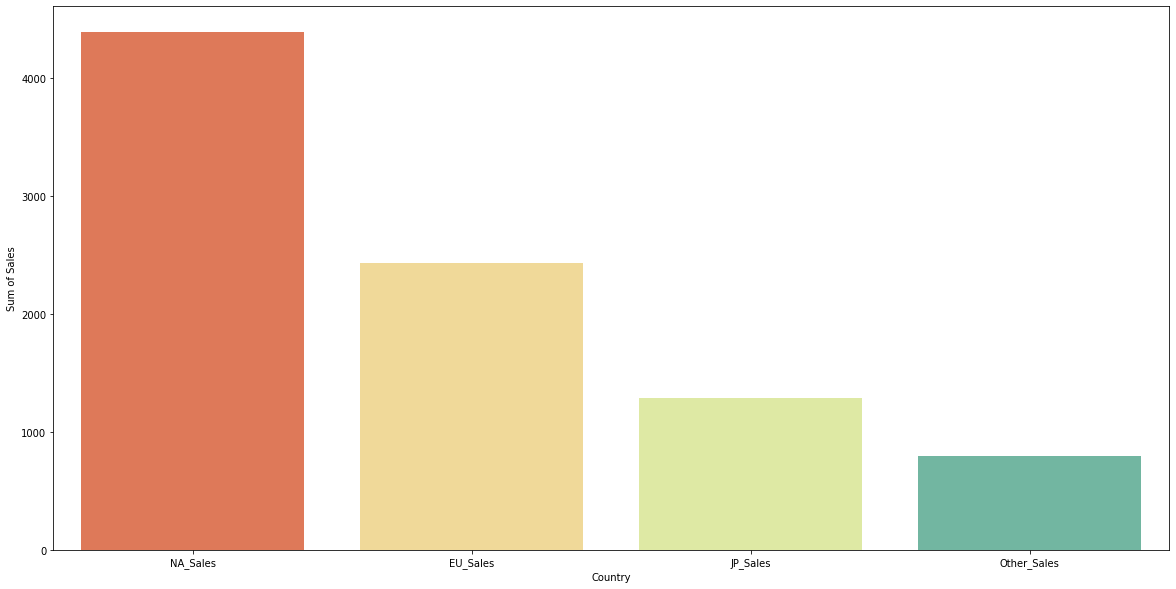

In [144]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country", y="Sum of Sales", data =top_sales_by_countrys, palette= "Spectral")

In [145]:
label = top_sales_by_countrys["Country"]

In [146]:
label

0       NA_Sales
1       EU_Sales
2       JP_Sales
3    Other_Sales
Name: Country, dtype: object

In [147]:
sum_of_sales = top_sales_by_countrys["Sum of Sales"]

In [148]:
sum_of_sales

0    4392.95
1    2434.13
2    1291.02
3     797.75
Name: Sum of Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7f1a94d9a730>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

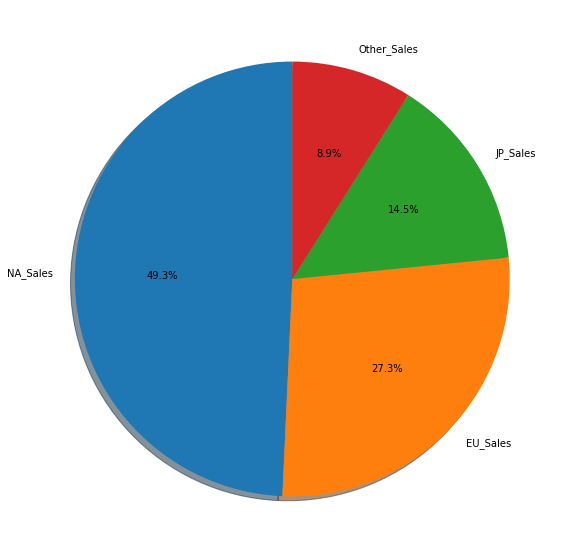

In [149]:
plt.figure(figsize=(20,10))
plt.pie(sum_of_sales, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)

Histograma de Vendas

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

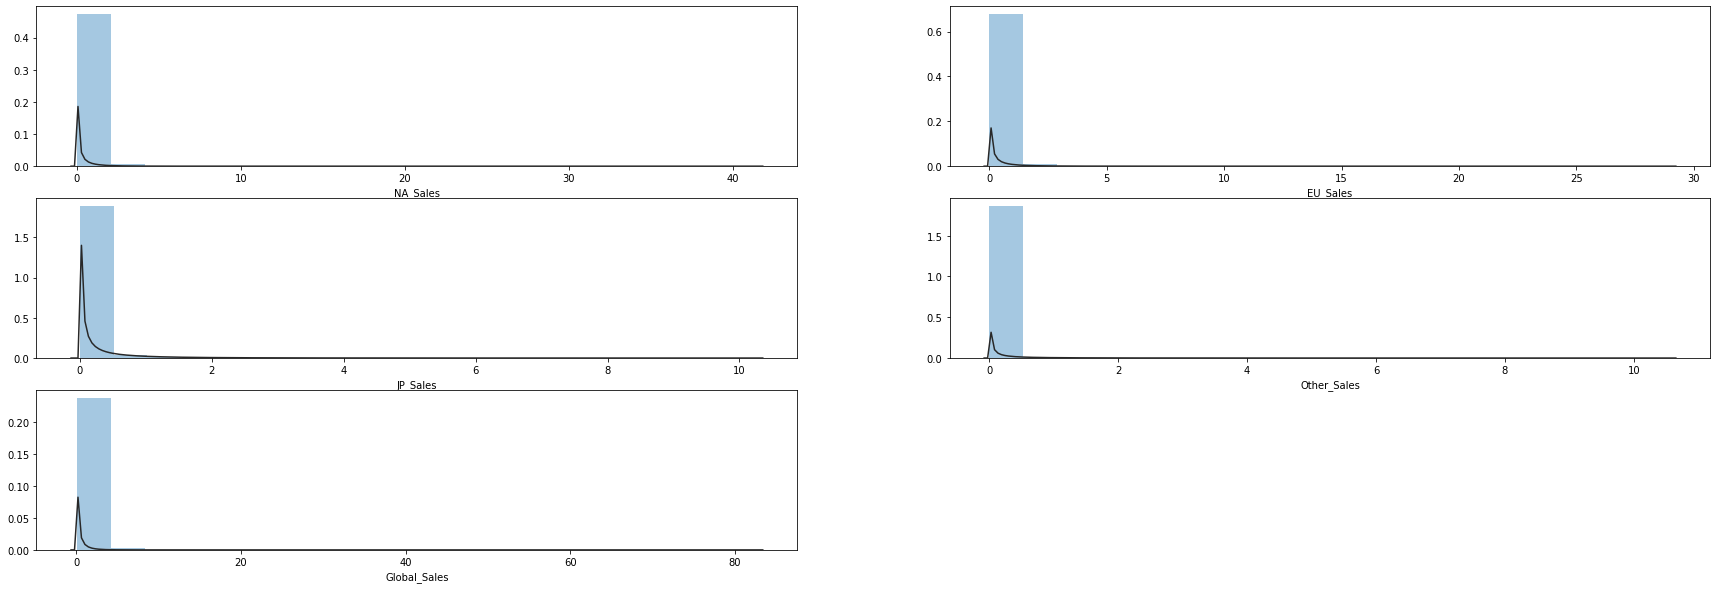

In [150]:
plt.figure(figsize=(30,10))
columns_country =  ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, j in enumerate(columns_country):
    plt.subplot(3,2,i+1)
    sns.distplot(df[j], bins=20, kde=False, fit=stats.gamma)

In [151]:
df_hist_transform_log = df.copy()

In [152]:
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.NA_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.EU_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Other_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.JP_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Global_Sales != 0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

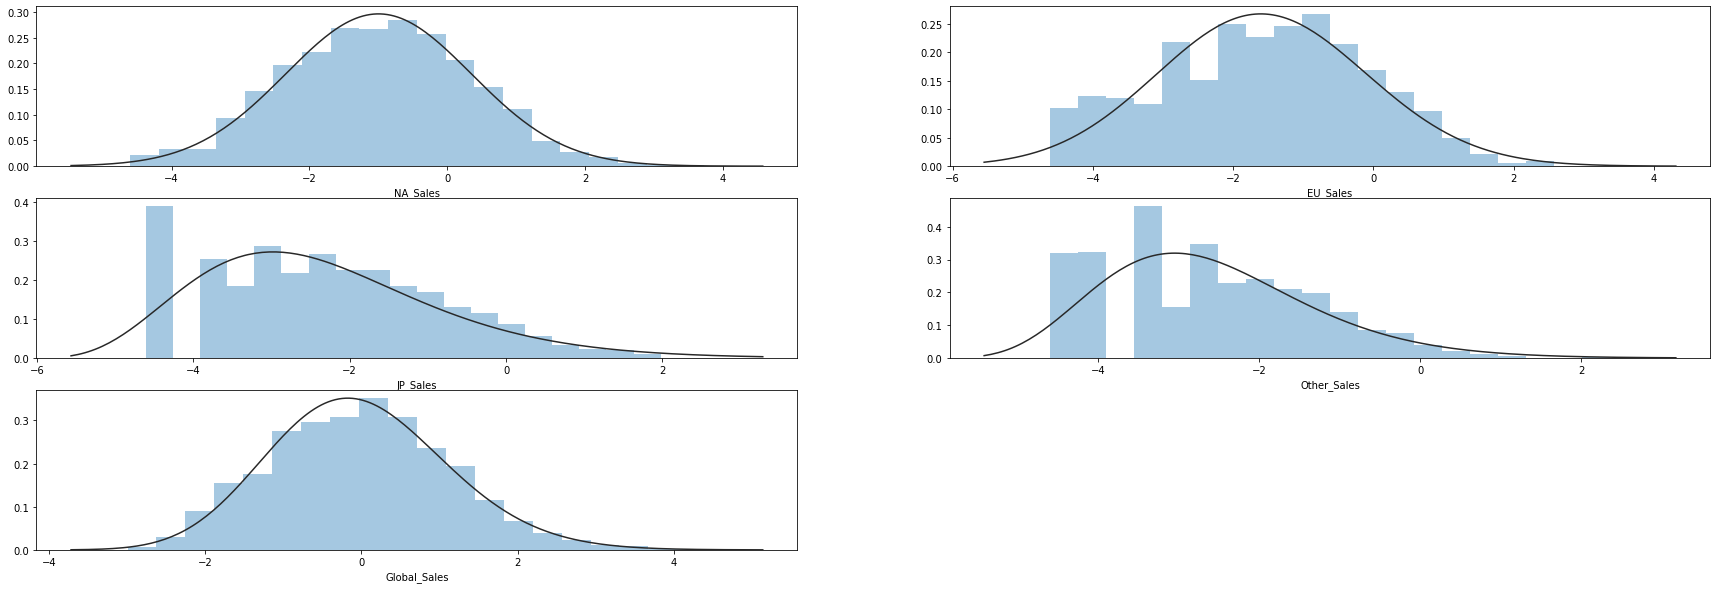

In [153]:
plt.figure(figsize=(30,10))
columns_country = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, j in enumerate(columns_country):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma)

Correlação entre as Features

In [154]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.008500,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,-0.008500,1.000000,0.005031,0.013993,0.018223,0.011731,0.012232
NA_Sales,-0.401362,0.005031,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.013993,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,0.018223,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.011731,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,0.012232,0.941047,0.902836,0.611816,0.748331,1.000000


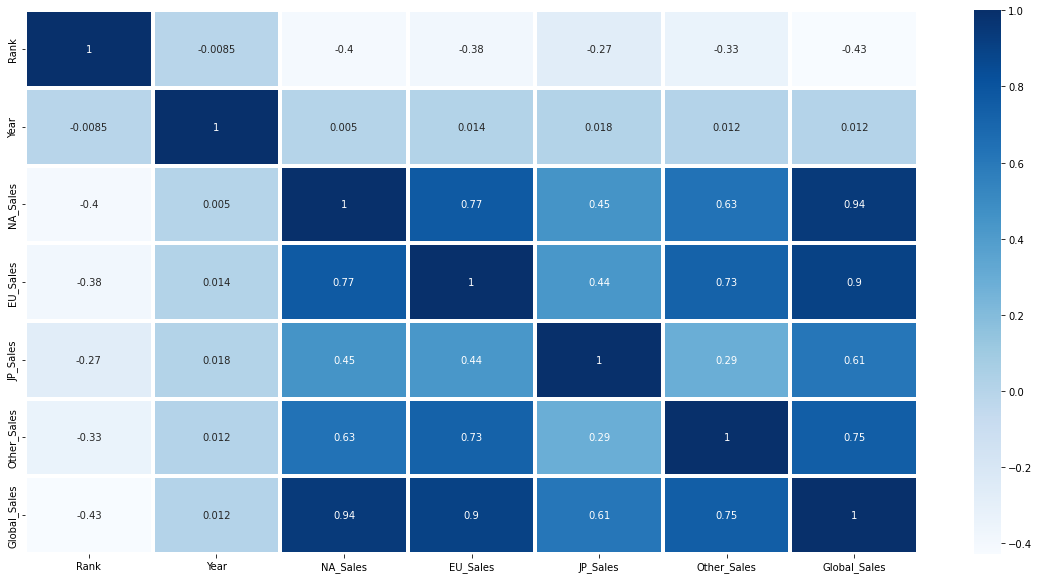

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True, linewidth=3)

Pairplot

In [156]:
df_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]

In [157]:
df_pair.head()

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00


<Figure size 1440x720 with 0 Axes>

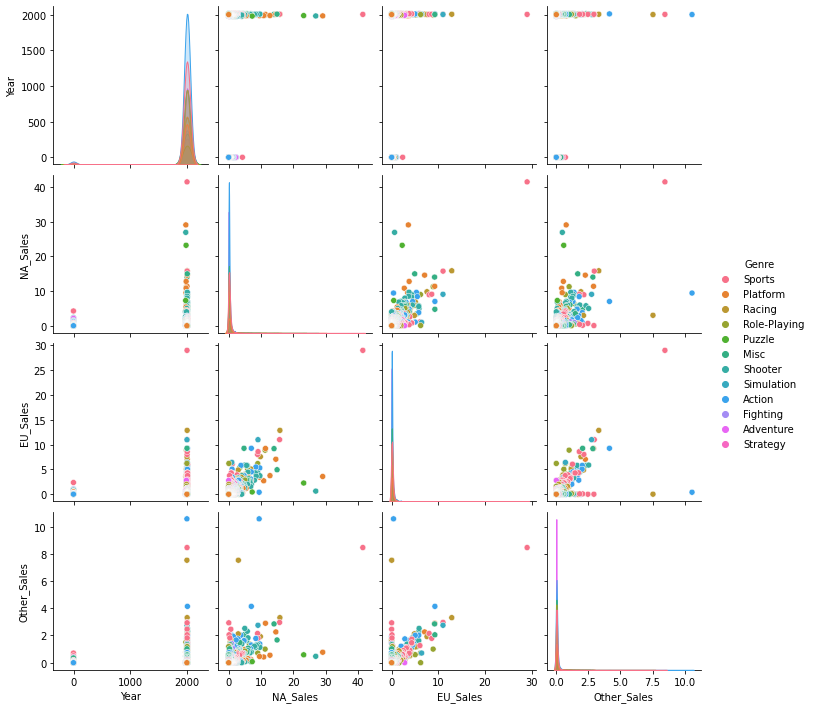

In [158]:
plt.figure(figsize=(20, 10))
sns.pairplot(df_pair, hue='Genre')
plt.show()